# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [2]:
df = pd.read_csv('hotel_bookings_data.csv')

In [9]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0,No Deposit,394.0,NaN,0,Personal,96.14,0,0,Check-Out
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0,No Deposit,9.0,NaN,0,Personal,225.43,0,2,Check-Out
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,0,No Deposit,9.0,NaN,0,Personal,157.71,0,4,Check-Out
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0,No Deposit,89.0,NaN,0,Personal,104.40,0,0,Check-Out


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Preprocessing

## Handling Duplicate

In [5]:
df.duplicated().sum()

33261

In [7]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
22,Resort Hotel,0,72,2017,September,27,1,2,4,2,...,1,No Deposit,250.0,NaN,0,Personal,84.67,0,1,Check-Out
43,Resort Hotel,0,70,2017,September,27,2,2,3,2,...,0,No Deposit,250.0,NaN,0,Personal,137.00,0,1,Check-Out
138,Resort Hotel,1,5,2017,September,28,5,1,0,2,...,0,No Deposit,240.0,NaN,0,Personal,97.00,0,0,Canceled
200,Resort Hotel,0,0,2017,September,28,7,0,1,1,...,0,No Deposit,240.0,NaN,0,Personal,109.80,0,3,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2019,October,35,31,0,3,2,...,0,No Deposit,9.0,NaN,0,Personal,126.00,0,2,Check-Out
119352,City Hotel,0,63,2019,October,35,31,0,3,3,...,0,No Deposit,9.0,NaN,0,Family,195.33,0,2,Check-Out
119353,City Hotel,0,63,2019,October,35,31,0,3,3,...,0,No Deposit,9.0,NaN,0,Family,195.33,0,2,Check-Out
119354,City Hotel,0,63,2019,October,35,31,0,3,3,...,0,No Deposit,9.0,NaN,0,Family,195.33,0,2,Check-Out


In [10]:
df.drop_duplicates(inplace=True)

## Handling Missing Value

In [11]:
def preprocessing(df):
    """"
    Objective :
    Function for preprocessing data, known missing, duplicated values and basic stastics every column in dataframe and duplicated row
    df is dataframe
    """
    try:
        import pandas as pd
        variables = pd.DataFrame(columns=['Variable','Number of unique values','Percent of Null(%)','Number of Duplicated','Type','Values'])
        for i, var in enumerate(df.columns):
            variables.loc[i] = [var, df[var].nunique(),df[var].isnull().sum()/df.shape[0]*100,df[var].duplicated(keep=False).sum(),df[var].dtypes,df[var].unique()]
        return (variables.set_index('Variable'))
    except:
        print('ada kesalahan penginputan')

In [12]:
preprocessing(df)

,Number of unique values,Percent of Null(%),Number of Duplicated,Type,Values
Variable,,,,,
hotel,2,0.000000,86129,object,"[Resort Hotel, City Hotel]"
is_canceled,2,0.000000,86129,int64,"[0, 1]"
lead_time,479,0.000000,86107,int64,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68..."
arrival_date_year,3,0.000000,86129,int64,"[2017, 2018, 2019]"
arrival_date_month,12,0.000000,86129,object,"[September, October, November, December, Janua..."
arrival_date_week_number,53,0.000000,86129,int64,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3..."
arrival_date_day_of_month,31,0.000000,86129,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
stays_in_weekend_nights,17,0.000000,86127,int64,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,..."
stays_in_weekdays_nights,35,0.000000,86121,int64,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,..."


**Data Insight**

company have more than 20% missing value. Company can be dropped

In [15]:
df.drop('company',axis=1,inplace=True)

In [17]:
missing_value = ['children','city','agent']

In [19]:
num_missing_value = ['children','agent']

In [18]:
preprocessing(df[missing_value])

,Number of unique values,Percent of Null(%),Number of Duplicated,Type,Values
Variable,,,,,
children,5,0.004644,86128,float64,"[0.0, 1.0, 2.0, 10.0, 3.0, nan]"
city,177,0.522472,86096,object,"[Kota Denpasar, Kabupaten Bangka, Kabupaten Sl..."
agent,333,13.864088,86070,float64,"[nan, 304.0, 240.0, 303.0, 15.0, 241.0, 8.0, 2..."


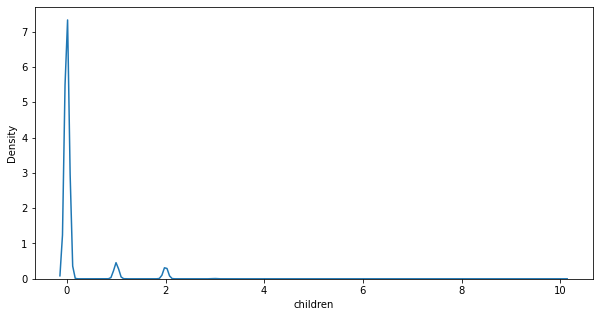

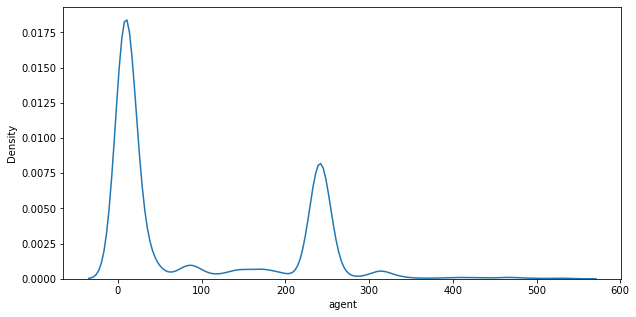

In [22]:
for j in range (0,len(num_missing_value)):
    num = num_missing_value[j]
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=df,x=num)

**Data Insight**

Fill missing value with median of data

In [29]:
df[num_missing_value].fillna(df.median(),inplace=True)

C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_7508\628287763.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[num_missing_value].fillna(df.median(),inplace=True)
C:\Users\Muhammad Hanif\AppData\Local\Temp\ipykernel_7508\628287763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_missing_value].fillna(df.median(),inplace=True)


In [30]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_weekdays_nights              0
adults                                0
children                              4
babies                                0
meal                                  0
city                                450
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
booking_changes                       0
deposit_type                          0
agent                             11941
days_in_waiting_list                  0
customer_type                         0
adr                                   0
